# Note 

In this chapter, `np.random` is not used except for `np.random.rand()`. <br>
In `prml.sampling_methods`, this princple is followed.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from math import gamma 

from prml.sampling_methods import (
    BoxMuller,
    GaussSampling,
    InverseFunctionSampling,
    RejectionSampling
)

# Inverse function sampling

In [2]:
def p(x,lamda = 1):
    return lamda*np.exp(-lamda*x)

def inv_f(x,lamda=1):
    return -np.log(1 - x)/lamda

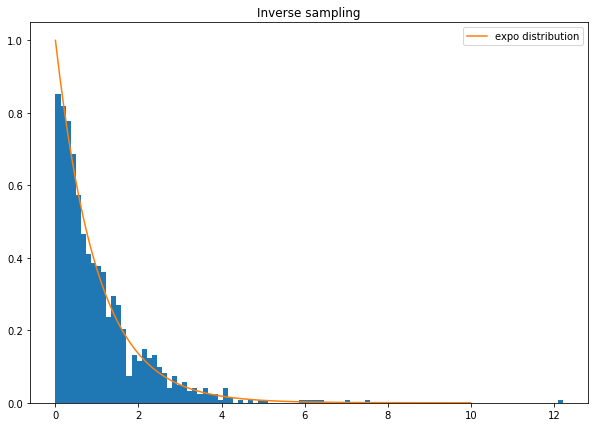

In [3]:
sampler = InverseFunctionSampling(inv_f)
X = sampler.sampling(n = 1000)

fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.hist(X,bins=100,density=True,stacked=True) # for normalize 
x = np.linspace(0,10,100)
ax.plot(x,p(x),label="expo distribution")
ax.set_title("Inverse sampling")
plt.legend()
plt.show()

# Box Muller 

In [4]:
def gauss(x):
    return 1/(2*np.pi)**0.5*np.exp(-x**2/2)

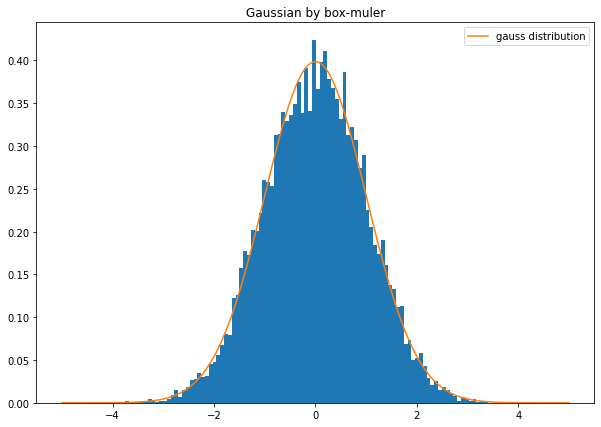

In [5]:
bm = BoxMuller()
X = bm.sampling(n=10000)

fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.hist(X,bins=100,density=True,stacked=True) # for normalize 
x = np.linspace(-5,5,100)
ax.plot(x,gauss(x),label="gauss distribution")
ax.set_title("Gaussian by box-muler")
plt.legend()
plt.show()

## Gauss sampling 

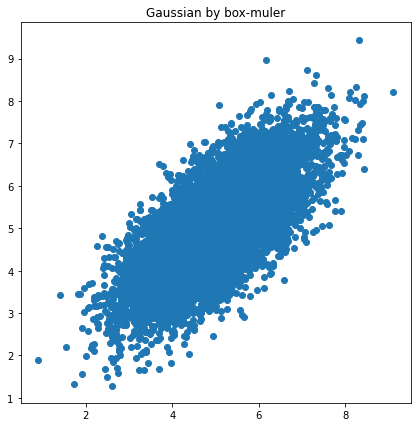

In [6]:
smp = GaussSampling(D = 2,mu = np.array([5,5]),sigma=np.array([[1,0.7],[0.7,1]]))
X = smp.sampling(n = 10000)

fig,ax = plt.subplots(1,1,figsize=(7,7))
ax.scatter(X[:,0],X[:,1])
ax.set_title("Gaussian by box-muler")
plt.show()

# Rejection Sampling

In [8]:
def p(x,a=2,b=2):
    # gamma
    return 1/gamma(a)*b**a*x**(a-1)*np.exp(-b*x)

def q(x,b=1,c=0):
    # cauchy 
    return 1/(1 + (x - c)**2/b**2)

def inv_f(x,b=1,c=0):
    # cauchy 
    return b*np.tan(x) + x

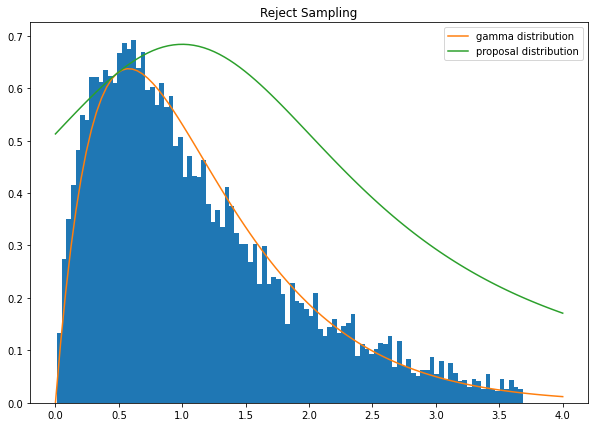

In [9]:
a = 2 
b = (2*a-1)**0.5
c = a-1

isp = InverseFunctionSampling(inv_f=lambda x:inv_f(x,b,c))
rsp = RejectionSampling(
    p=lambda x:p(x,a,b),
    q=lambda x:q(x,b,c),
    q_sampler=isp,
    k_lower=0,
    k_upper=10
)
X = rsp.sampling(n=10000)

fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.hist(X,bins=100,density=True,stacked=True) # for normalize 
x = np.linspace(0,4,100)
ax.plot(x,p(x,a,b),label="gamma distribution")
ax.plot(x,rsp.k*q(x,b,c),label="proposal distribution")
ax.set_title("Reject Sampling")
plt.legend()
plt.show()